# Projet 1 - Classification 

* **Authors:** Mouna Dhaouadi / Kacem Khaled
* **Class:** IFT6285
* **Term:** Fall 2021
* **Professor** Dr. Philippe Langlais

### Connecting to drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
kacemdir = "/content/drive/My Drive/1-Polymtl/IFT6285"
mounadir=  "/content/drive/My Drive/IFT6285"
os.chdir(kacemdir)
!ls

'Copy of text-transformers.ipynb'   Models
 Data				    Outputs
 dataframes.ipynb		   'Projet1-Classification - task1.ipynb'
'devoir1 (1).ipynb'		   'Projet1-Classification - task2.ipynb'
 devoir1.ipynb			    TP2.ipynb
 Links.gdoc


## Task 1 : COLA

### Step1 : Download and get to know the data 

In [3]:
import pandas as pd
from statistics import mean

In [4]:
COLA_data_folder = 'Data/CoLA/'
COLA_models_folder  = 'Models/CoLA/'
COLA_output_folder = 'Outputs/CoLA/'

train_cola_file = COLA_data_folder +'train.tsv'
dev_cola_file =COLA_data_folder + 'dev.tsv'
test_cola_file =COLA_data_folder  + 'test.tsv'

In [5]:
train_cola_data =  pd.read_table(train_cola_file, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
train_cola_data

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8546,0,Poseidon appears to own a dragon
8547,0,Digitize is my happiest memory
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [6]:
train_cola_data['Acceptability judgment label'].value_counts()

1    6023
0    2528
Name: Acceptability judgment label, dtype: int64

In [8]:
from seaborn import countplot
countplot(x='Acceptability judgment label', data = train_cola_data)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
train_cola_data_wrong = train_cola_data.loc[train_cola_data['Acceptability judgment label'].isin([0])]
train_cola_data_wrong

,Acceptability judgment label,Sentence
18,0,They drank the pub.
20,0,The professor talked us.
22,0,We yelled ourselves.
23,0,We yelled Harry hoarse.
25,0,Harry coughed himself.
...,...,...
8531,0,Anson believed to be happy.
8539,0,Anson left before Jenny saw himself.
8545,0,Anson thought that himself was going to the club.
8546,0,Poseidon appears to own a dragon


In [ ]:
train_cola_data_right = train_cola_data.loc[train_cola_data['Acceptability judgment label'].isin([1])]
train_cola_data_right

,Acceptability judgment label,Sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8543,1,Gilgamesh perhaps should be leaving.
8544,1,Gilgamesh hasn't kissed Ishtar.
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [ ]:
cola_sentences_list =  [sent for sent in train_cola_data["Sentence"]]
cola_max_len = len ( max(cola_sentences_list, key=len) ) 
cola_min_len = len ( min(cola_sentences_list, key=len) )
cola_avg_len = mean ( [ len(sent) for sent in cola_sentences_list ]  )
cola_max_len, cola_min_len, cola_avg_len

(231, 6, 40.700736755934976)

In [ ]:
cola_wrong_sentences_list =  [sent for sent in train_cola_data_wrong["Sentence"]]
cola_wrong_max_len = len ( max(cola_wrong_sentences_list, key=len) ) 
cola_wrong_min_len = len ( min(cola_wrong_sentences_list, key=len) )
cola_wrong_avg_len = mean ( [ len(sent) for sent in cola_wrong_sentences_list ]  )
cola_wrong_max_len, cola_wrong_min_len, cola_wrong_avg_len

(151, 6, 40.71558544303797)

In [ ]:
cola_right_sentences_list =  [sent for sent in train_cola_data_right["Sentence"]]
cola_right_max_len = len ( max(cola_right_sentences_list, key=len) ) 
cola_right_min_len = len ( min(cola_right_sentences_list, key=len) )
cola_right_avg_len = mean ( [ len(sent) for sent in cola_right_sentences_list ]  )
cola_right_max_len, cola_right_min_len, cola_right_avg_len

(231, 6, 40.69450439980076)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


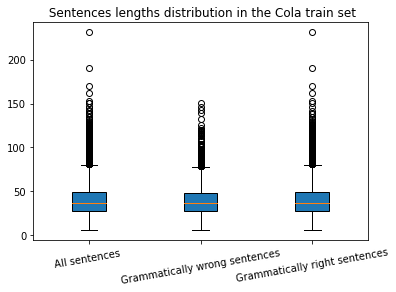

In [ ]:
import matplotlib.pyplot as plt

data_for_boxplots = [ [ len(sent) for sent in cola_sentences_list ], [ len(sent) for sent in cola_wrong_sentences_list ], [ len(sent) for sent in cola_right_sentences_list ]]
fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.set_title(' Sentences lengths distribution in the Cola train set')
ax_boxplot.boxplot(data_for_boxplots, patch_artist = True)
plt.xticks([1, 2, 3], ["All sentences ", "Grammatically wrong sentences", "Grammatically right sentences"], rotation=10)
plt.show()

In [ ]:
#todo: do the same for the dev set + put the statitisic in tables like slide 4 of sklearn PDF in the report  + put in the report 
dev_cola_data =  pd.read_table(dev_cola_file, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])
dev_cola_data

,Acceptability judgment label,Sentence
0,1,The sailors rode the breeze clear of the rocks.
1,1,The weights made the rope stretch over the pulley.
2,1,The mechanical doll wriggled itself loose.
3,1,"If you had eaten more, you would want less."
4,0,"As you eat the most, you want the least."
...,...,...
1038,1,John considers Bill silly.
1039,1,John considers Bill to be silly.
1040,0,John bought a dog for himself to play with.
1041,1,John arranged for himself to get the prize.


### Step 2 : Use a reasonable baseline and evaluate it 

In [ ]:
from sklearn.dummy import DummyClassifier
from joblib import dump, load
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, average_precision_score, f1_score

#### Dummy Classifier to start with

In [ ]:
# Dummy classifier  train 
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(train_cola_data['Sentence'], train_cola_data['Acceptability judgment label'])

#save model 
dump(dummy_classifier, COLA_models_folder+'dummy-most.clf')

# load model 
clf_dummy = load(COLA_models_folder+'dummy-most.clf')

# predict with the model
y_dummy = clf_dummy.predict(dev_cola_data['Sentence']) # predictions

# output and save  the prediction
out = COLA_output_folder+"dummy_model.out"
pickle.dump([clf_dummy.classes_, y_dummy], open(out, 'wb'))

#open and read picle file to get predictions 
[ clf_dummy.classes_,y_dummy1 ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.69      1.00      0.82       721

    accuracy                           0.69      1043
   macro avg       0.35      0.50      0.41      1043
weighted avg       0.48      0.69      0.57      1043



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Reseanable baseline : Logistic Regression with TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 

LogisticRegression_classifier = LogisticRegression()
LogisticRegression_classifier.fit(X_train, train_cola_data['Acceptability judgment label'])

# dump the vectorizer and the model (for use at test time)
dump(vectorizer, COLA_models_folder + 'tf-idf_vectorizer.vec')
dump(LogisticRegression_classifier, COLA_models_folder + 'LogisticRegression_classifier.clf') 

# load model + vec
vectorizer = load(COLA_models_folder + 'tf-idf_vectorizer.vec')
LogisticRegression_classifier = load(COLA_models_folder+'LogisticRegression_classifier.clf')

# predict with the model
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR = LogisticRegression_classifier.predict(X_test) # run the classifier

# output and save  the prediction
out = COLA_output_folder+"LogisticRegression_model.out"
pickle.dump([LogisticRegression_classifier.classes_, y_LR], open(out, 'wb'))

#open and read pickle file to get predictions 
[ LogisticRegression_classifier.classes_,y_LR ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

print('accuracy score', accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR))
print('average precision score', average_precision_score(dev_cola_data['Acceptability judgment label'], y_LR) )
print('f1 score', f1_score(dev_cola_data['Acceptability judgment label'], y_LR))

              precision    recall  f1-score   support

           0       0.43      0.06      0.10       322
           1       0.70      0.97      0.81       721

    accuracy                           0.69      1043
   macro avg       0.56      0.51      0.46      1043
weighted avg       0.61      0.69      0.59      1043

accuracy score 0.6855225311601151
average precision score 0.6965087102573256
f1 score 0.8093023255813954


In [ ]:
baseline_vectorizer = vectorizer
baseline_classifier = LogisticRegression_classifier

baseline_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR)
baseline_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_LR)

print(baseline_accuracy, baseline_f1_score)

0.6855225311601151 0.8093023255813954


#### Evaluation

different scoring metrics :  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 

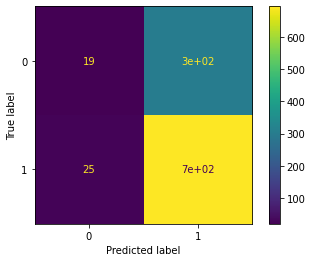

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(dev_cola_data['Acceptability judgment label'], y_LR, labels=baseline_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=baseline_classifier.classes_)
disp.plot()

### Step3 : Trying to improve the baselines with various curious ways

 #### investigated the use of Cross Validation (training) --> it did not work , maybe remove this part later, I think it is irelevant. the performance on the test set did not change

In [ ]:
from sklearn.model_selection import cross_val_score

scoring = [ 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
accuracies = []
f1_scores = []

for score in scoring:
  #cross validation on the train set
  # #TODO change this with : cross_validate  
  scores = cross_val_score(baseline_classifier, X_train, train_cola_data['Acceptability judgment label'], scoring=score, cv=20)
  print (scores)
  # report performance
  print('Accuracy: %.3f' % mean(scores))

  #on the test set now --> nothing changed
  y_LR_CV = baseline_classifier.predict(X_test) # run the classifier
  print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR_CV))
  print('accuracy score', accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_CV))
  print('average precision score', average_precision_score(dev_cola_data['Acceptability judgment label'], y_LR_CV) )
  print('f1 score', f1_score(dev_cola_data['Acceptability judgment label'], y_LR_CV))
  print('##########')

  #compare to the baseline
  LR_CV_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_CV)
  accuracies.append(LR_CV_accuracy)
  LR_CV_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_LR_CV)
  f1_scores.append(LR_CV_f1_score)

for index, score in enumerate(scoring):
  # print(accuracies[index], baseline_accuracy, )
  print("Improvement of %f in accuracy compared to the baseline using scoring fuction = %s" % (  (100 * (accuracies[index] - baseline_accuracy) / baseline_accuracy) , score ) )
  print('Improvement of %f in f1_score compared to the baseline using scoring fuction = %s' % ( (100 * (f1_scores[index] - baseline_f1_score) / baseline_f1_score), score ) )

[0.70327103 0.64719626 0.64953271 0.5911215  0.66588785 0.64719626
 0.62383178 0.6588785  0.6682243  0.62616822 0.66588785 0.6440281
 0.54332553 0.6440281  0.59953162 0.68149883 0.67915691 0.68384075
 0.68852459 0.70257611]
Accuracy: 0.651
              precision    recall  f1-score   support

           0       0.43      0.06      0.10       322
           1       0.70      0.97      0.81       721

    accuracy                           0.69      1043
   macro avg       0.56      0.51      0.46      1043
weighted avg       0.61      0.69      0.59      1043

accuracy score 0.6855225311601151
average precision score 0.6965087102573256
f1 score 0.8093023255813954
##########
[0.5766375  0.34367246 0.4084596  0.34333333 0.43110561 0.40719697
 0.40684043 0.36901837 0.34624697 0.37907851 0.41547246 0.34289277
 0.33148046 0.34289277 0.356387   0.42130751 0.38749535 0.48329463
 0.51083591 0.51926101]
Accuracy: 0.406
              precision    recall  f1-score   support

           0       0.

#### Investigate the use of Grid search for LR classifier --> very minor improvement in accuracy and f1 score

In [ ]:
## using the gridSearch - for LR classifier , not the vectorizer, on the Train Set !!! 

from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None

param_grid = dict(C=C_values, class_weight=class_weights , solver = solvers )
print(param_grid)

grid = GridSearchCV(baseline_classifier, param_grid, cv=10, scoring='accuracy')
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
grid.fit(X_train, train_cola_data['Acceptability judgment label'])

#affichage 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# predict with the best parameteres 
X_test = vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
y_LR_best = grid.predict(X_test) 
print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR_best))


  #compare to the baseline
LR_best_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_best)
LR_best_score = f1_score(dev_cola_data['Acceptability judgment label'],y_LR_best)

print(LR_best_accuracy, LR_best_score, baseline_accuracy, baseline_f1_score)
print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (LR_best_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (LR_best_score - baseline_f1_score) / baseline_f1_score))


{'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
0.6869369295512925
{'C': 0.5, 'class_weight': None, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       322
           1       0.69      0.99      0.81       721

    accuracy                           0.69      1043
   macro avg       0.51      0.50      0.42      1043
weighted avg       0.58      0.69      0.57      1043

0.6874400767018217 0.8139269406392693 0.6855225311601151 0.8093023255813954
Improvement of 0.28% in accuracy compared to the baseline.
Improvement of 0.57% in f1_score compared to the baseline.


#### Impact of changing hyper-parmeters of the baseline - minor improvement in accuracy and f1 score




In [ ]:
def train_save_predict(vectorizer, classifer, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name):
    
    X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
    classifer.fit(X_train, train_cola_data['Acceptability judgment label'])

    # dump the vectorizer and the model (for use at test time)
    dump(vectorizer, COLA_models_folder + vectorizer_name )
    dump(classifier, COLA_models_folder + classifier_name) 

    # load model + vec
    tf_idf_vectorizer = load(COLA_models_folder + vectorizer_name)
    LR_classifier = load(COLA_models_folder+classifier_name)

    # predict with the model
    X_test = tf_idf_vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
    y_LR = LR_classifier.predict(X_test) # run the classifier

    # output and save  the prediction
    out = COLA_output_folder+'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
    pickle.dump([LR_classifier.classes_, y_LR], open(out, 'wb'))



###### Step 1 :  try different meta-parameters and save them in different files.


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None


for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          print(max_df, min_df)
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                  # a number of options can control a vectorizer, I reckon you investigate them
                  vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_df,
                                              max_df=max_df,
                                              ngram_range=ngram_range)
                  
                  vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                  vectorizer_name = 'tf-idf_vectorizer'+vec_meta_parameters_name+'.vec'

                  classifier = LogisticRegression(C=c,class_weight=class_weight, solver=solver)
                  clf_meta_parameters_name = '_C='+str(c)+'_class_weight='+ str(class_weight)+'_solver='+str(solver)

                  classifier_name = 'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+'.clf'
                  print(classifier_name)
                  try:
                    train_save_predict(vectorizer, classifier, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name )
                  except ValueError as err:
                    print(err)



In [ ]:
###### Step 2: get the output files saved and calculate the evaluation metrics of all of them


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
C_values =[0.5 ,1, 1.5]  # default=1.0
class_weights = ['balanced', None] # default=None


accuracy_scores = []
f1_scores = []

vect_parameters = []
clsf_parameters = []

for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for solver in solvers: 
              for c in C_values:
                for class_weight in class_weights:
                   vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                   clf_meta_parameters_name = '_C='+str(c)+'_class_weight='+ str(class_weight)+'_solver='+str(solver)
                   filename = COLA_output_folder+'LogisticRegression_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
                   if os.path.isfile(filename): #is file exists
                      #open and read picle file to get predictions 
                      [ _ , y_LR_t ] = pickle.load( open(filename, 'rb'))

                      #compare and evaluate the predictions
                      #print(filename)
                      #print(classification_report(dev_cola_data['Acceptability judgment label'], y_LR))

                      vect_params={'analyzer':analyzer, 'ngram_range': ngram_range, 'min_df':min_df, 'max_df':max_df}
                      clsf_params={'solver':solver, 'C':c, 'class_weight':class_weight}

                      accuracy_scores.append( accuracy_score(dev_cola_data['Acceptability judgment label'], y_LR_t)  )
                      f1_scores.append( f1_score(dev_cola_data['Acceptability judgment label'],y_LR_t) )

                      vect_parameters.append(vect_params)
                      clsf_parameters.append(clsf_params)


print(accuracy_scores)
print(f1_scores)
print(baseline_accuracy, baseline_f1_score)

d =  {'vectorizer parameters': vect_parameters, 'classifier parameters': clsf_parameters, 'accuracy score': accuracy_scores, 'f1 score' : f1_scores}
df = pd.DataFrame(data=d)
df.sort_values('accuracy score', ascending=False)

[0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816, 0.5263662511984659, 0.6903163950143816, 0.5254074784276127, 0.6903163950143816,

,vectorizer parameters,classifier parameters,accuracy score,f1 score
1087,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.691275,0.817460
533,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 1.5, 'class_weight': None}",0.691275,0.817460
1049,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'saga', 'C': 1.5, 'class_weight': N...",0.691275,0.817460
525,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1, 'class_weight'...",0.691275,0.817460
527,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.691275,0.817460
...,...,...,...,...
1482,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'liblinear', 'C': 0.5, 'class_weigh...",0.509108,0.594295
1488,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.509108,0.594295
1476,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.509108,0.594295
1494,"{'analyzer': 'char_wb', 'ngram_range': (2, 2),...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.509108,0.594295


In [ ]:
best_accuracy_score=df.sort_values('accuracy score', ascending=False)['accuracy score'].iloc[0]

print('Best Improvement = {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (best_accuracy_score - baseline_accuracy) / baseline_accuracy))

Best Improvement of 0.84% in accuracy compared to the baseline.


In [ ]:
df.sort_values('f1 score', ascending=False)

,vectorizer parameters,classifier parameters,accuracy score,f1 score
1061,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'lbfgs', 'C': 1.5, 'class_weight': ...",0.691275,0.817460
1019,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'saga', 'C': 1.5, 'class_weight': N...",0.691275,0.817460
1021,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'newton-cg', 'C': 0.5, 'class_weigh...",0.691275,0.817460
347,"{'analyzer': 'word', 'ngram_range': (1, 2), 'm...","{'solver': 'liblinear', 'C': 1.5, 'class_weigh...",0.691275,0.817460
1023,"{'analyzer': 'char_wb', 'ngram_range': (1, 1),...","{'solver': 'newton-cg', 'C': 1, 'class_weight'...",0.691275,0.817460
...,...,...,...,...
588,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 0.5, 'class_weight': 'b...",0.525407,0.590571
594,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'saga', 'C': 0.5, 'class_weight': '...",0.525407,0.590571
592,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'sag', 'C': 1.5, 'class_weight': 'b...",0.525407,0.590571
576,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'solver': 'lbfgs', 'C': 0.5, 'class_weight': ...",0.525407,0.590571


In [ ]:
best_f1_score=df.sort_values('f1 score', ascending=False)['f1 score'].iloc[0]

print('Best Improvement = {:0.2f}% in f1 score compared to the baseline.'.format( 100 * (best_f1_score - baseline_f1_score) / baseline_f1_score))

Best Improvement = 1.01% in f1 score compared to the baseline.


In [ ]:
#maybe to investigate results more

#### Impact of  pre-processing techniques (todo)

In [ ]:
we do not consider removing stop words -> makes them wrong 

#### Performace of other feature- models  - Random Forest + TF-IDF VECTORIZER ---> made accuracy + f1 score worst / then using Grid search, minor imporvement

In [ ]:
# https://www.kaggle.com/onadegibert/sentiment-analysis-with-tfidf-and-random-forest
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

tfidf_vect = TfidfVectorizer()
tfidf_vect_fit=tfidf_vect.fit(train_cola_data['Sentence'])
X_train=vectorize(train_cola_data['Sentence'],tfidf_vect_fit)

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, train_cola_data['Acceptability judgment label'])

X_test=vectorize(dev_cola_data['Sentence'],tfidf_vect_fit)
y_RF = clf_RF.predict(X_test) # run the classifier
print(classification_report(dev_cola_data['Acceptability judgment label'], y_RF))


              precision    recall  f1-score   support

           0       0.43      0.15      0.22       322
           1       0.71      0.91      0.80       721

    accuracy                           0.68      1043
   macro avg       0.57      0.53      0.51      1043
weighted avg       0.62      0.68      0.62      1043



In [ ]:
#todo: save the RF model and the ouputs 

In [ ]:
#compare to the baseline
RF_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_RF)
RF_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_RF)

print(baseline_accuracy, baseline_f1_score)
print(RF_accuracy,RF_f1_score )

print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (RF_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (RF_f1_score - baseline_f1_score) / baseline_f1_score))

0.6855225311601151 0.8093023255813954
0.675934803451582 0.7951515151515153
Improvement of -1.40% in accuracy compared to the baseline.
Improvement of -1.75% in f1_score compared to the baseline.


In [ ]:
# improve Random Forest using Grid search
from sklearn.model_selection import RandomizedSearchCV

max_depths = [80, 90, 100, 110]
max_features = [2,3]
min_samples_leafs= [3, 4, 5]
min_samples_splits =  [8, 10, 12]
n_estimators = [100, 200, 300, 1000]
bootstrap = [True]

param_dist = dict(n_estimators=n_estimators, bootstrap=bootstrap, max_depth=max_depths, max_features=max_features, min_samples_leaf = min_samples_leafs , min_samples_split = min_samples_splits )
print(param_grid)

rand = RandomizedSearchCV(clf_RF, param_dist, cv=10, n_iter=10, random_state=5)
rand.fit(X_train, train_cola_data['Acceptability judgment label'])
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


,mean_test_score,std_test_score,params
0,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 8, ..."
1,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 12,..."
2,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 10,..."
3,0.704362,0.000462,"{'n_estimators': 100, 'min_samples_split': 8, ..."
4,0.704362,0.000462,"{'n_estimators': 200, 'min_samples_split': 8, ..."
5,0.704362,0.000462,"{'n_estimators': 100, 'min_samples_split': 12,..."
6,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 12,..."
7,0.704362,0.000462,"{'n_estimators': 1000, 'min_samples_split': 12..."
8,0.704362,0.000462,"{'n_estimators': 300, 'min_samples_split': 12,..."
9,0.704362,0.000462,"{'n_estimators': 100, 'min_samples_split': 8, ..."


In [ ]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

# predict with the best parameteres 
y_RF_best = rand.predict(X_test) 
print(classification_report(dev_cola_data['Acceptability judgment label'], y_RF_best))

RF_best_accuracy = accuracy_score(dev_cola_data['Acceptability judgment label'], y_RF_best)
RF_best_f1_score = f1_score(dev_cola_data['Acceptability judgment label'], y_RF_best)

#compare to the baseline
print(RF_best_accuracy, RF_best_f1_score)
print(baseline_accuracy, baseline_f1_score)

print('Improvement of {:0.2f}% in accuracy compared to the baseline.'.format( 100 * (RF_best_accuracy - baseline_accuracy) / baseline_accuracy))
print('Improvement of {:0.2f}% in f1_score compared to the baseline.'.format( 100 * (RF_best_f1_score - baseline_f1_score) / baseline_f1_score))

0.7043620538886156
{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 3, 'max_depth': 80, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.69      1.00      0.82       721

    accuracy                           0.69      1043
   macro avg       0.35      0.50      0.41      1043
weighted avg       0.48      0.69      0.57      1043

0.6912751677852349 0.8174603174603174
0.6855225311601151 0.8093023255813954
Improvement of 0.84% in accuracy compared to the baseline.
Improvement of 1.01% in f1_score compared to the baseline.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#todo: save the best RF-model 

#### Performance of deep-learning models using transfer learning. BERT

In [ ]:
!pip install fastai --upgrade 
#!pip install fastai2
!pip uninstall fastai2

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
from fastai.text.all import *
#from fastai2.imports import *

files = get_files(COLA_data_folder, recurse=False, extensions='.tsv')
print(files)

dls = TextDataLoaders.from_df(train_cola_data, text_col='Sentence', label_col='Acceptability judgment label', valid_pct=0.1)  ## Random 10% as validation

dls.show_batch(max_n=3) # tokenized text

[Path('Data/CoLA/dev.tsv'), Path('Data/CoLA/train.tsv'), Path('Data/CoLA/test.tsv')]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj everybody who has ever , worked in any office which contained any xxunk which had ever been used to type any letters which had to be signed by any xxunk who ever worked in any department like mine will know what i xxunk .",1
1,"xxbos xxmaj xxunk plays the guitar and finds xxunk for all the old folk songs which are still sung in these hills , and xxmaj xxunk writes down all the old folk songs which are still sung in these hills .",1
2,"xxbos xxmaj handsome though everyone xxunk me to try to force xxmaj bill to make xxmaj xxunk agree that xxmaj dick is , xxmaj i 'm still going to xxmaj marry xxmaj herman .",1


In [ ]:
len(dls.train_ds), len(dls.valid_ds)

(7696, 855)

In [ ]:
# load a pretrained model
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, perplexity] )
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(2624, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(2624, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)


In [ ]:
# test it
print(learn.predict("I really liked that movie!"))
print(learn.predict("I hate  that movie!"))
print(learn.predict("I hate."))
print(learn.predict("himself we")) 
print(learn.predict("i we")) 
learn.show_results() # on the training 

('0', tensor(0), tensor([0.5068, 0.4932]))


('0', tensor(0), tensor([0.5026, 0.4974]))


('0', tensor(0), tensor([0.5100, 0.4900]))


('1', tensor(1), tensor([0.4963, 0.5037]))


('0', tensor(0), tensor([0.5006, 0.4994]))


,text,category,category_
0,"xxbos xxmaj will put a picture of xxmaj bill on your desk before tomorrow , this girl in the red coat will put a picture of xxmaj bill on your desk before tomorrow .",0,0
1,"xxbos xxmaj smith loaned a valuable collection of manuscripts to the library , and his widow later donated a valuable collection of manuscripts to the library .",1,0
2,"xxbos xxmaj ron wanted to wear a tuxedo to the party , but wear a tuxedo to the party xxmaj caspar could n't decide whether to .",0,0
3,"xxbos xxmaj the students of xxmaj english from xxmaj seoul xxunk many issues in the process of xxunk , xxunk , and xxunk the poems .",1,0
4,xxbos xxmaj this girl in the red coat will eat her breakfast and will put a picture of xxmaj bill on your desk before tomorrow .,1,0
5,xxbos xxmaj this is the sort of problem which the sooner you solve the more easily you 'll satisfy the folks up at corporate headquarters .,1,0
6,xxbos xxmaj that piece of ice is too big for it to be likely for him to be able to pick up with a xxunk .,0,0
7,"xxbos xxmaj this $ 500 xxunk will cost the government $ 500 , xxrep 3 0 to prove that xxmaj senator xxmaj jones accepted .",1,0
8,xxbos the book with a red cover of poems from xxmaj blackwell by xxmaj robert xxmaj burns takes a very long time to read .,0,0


In [ ]:
# then fine-tune it
learn.fine_tune(4, 1e-2)   # 4 epochs
# the accuracy shown is on the validation set

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.660408,0.617509,0.701754,1.854303,00:16


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.608951,0.603677,0.700585,1.828831,00:18
1,0.580884,0.580078,0.707602,1.786177,00:18
2,0.542218,0.567561,0.719298,1.763959,00:18
3,0.467514,0.583688,0.728655,1.792638,00:19


In [ ]:
# test it
print(learn.predict("I really liked that movie!"))
print(learn.predict("I hate  that movie!"))
print(learn.predict("I hate."))
print(learn.predict("himself we")) 
print(learn.predict("i we")) 

learn.show_results() # on the training 

('1', tensor(1), tensor([0.0607, 0.9393]))


('1', tensor(1), tensor([0.0194, 0.9806]))


('1', tensor(1), tensor([0.1862, 0.8138]))


('1', tensor(1), tensor([0.3327, 0.6673]))


('1', tensor(1), tensor([0.3626, 0.6374]))


,text,category,category_
0,"xxbos xxmaj will put a picture of xxmaj bill on your desk before tomorrow , this girl in the red coat will put a picture of xxmaj bill on your desk before tomorrow .",0,0
1,"xxbos xxmaj smith loaned a valuable collection of manuscripts to the library , and his widow later donated a valuable collection of manuscripts to the library .",1,1
2,"xxbos xxmaj ron wanted to wear a tuxedo to the party , but wear a tuxedo to the party xxmaj caspar could n't decide whether to .",0,0
3,"xxbos xxmaj the students of xxmaj english from xxmaj seoul xxunk many issues in the process of xxunk , xxunk , and xxunk the poems .",1,1
4,xxbos xxmaj this is the sort of problem which the sooner you solve the more easily you 'll satisfy the folks up at corporate headquarters .,1,0
5,xxbos xxmaj this girl in the red coat will eat her breakfast and will put a picture of xxmaj bill on your desk before tomorrow .,1,1
6,xxbos xxmaj that piece of ice is too big for it to be likely for him to be able to pick up with a xxunk .,0,1
7,"xxbos xxmaj pat wanted to try to go to xxmaj xxunk , and xxmaj chris to go to xxmaj rome . to xxmaj rome .",1,1
8,xxbos xxmaj the xxunk to which the xxunk took objection had to do with the mixed xxunk of a woman and a xxunk xxunk .,1,1


In [ ]:
preds, y = learn.get_preds(dl = dls.valid)
preds, y,  len(preds), len(y)

(tensor([[0.3026, 0.6974],
         [0.0828, 0.9172],
         [0.3063, 0.6937],
         ...,
         [0.4221, 0.5779],
         [0.2626, 0.7374],
         [0.0614, 0.9386]]),
 TensorCategory([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
         0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
         0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
         1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
         1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
         1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
    

In [ ]:
accuracy(preds, y) # on the validation set 

TensorBase(0.7287)

In [ ]:
dls_test = TextDataLoaders.from_df(dev_cola_data, text_col='Sentence', label_col='Acceptability judgment label', valid_pct=0.0)  # no validation
len(dls_test.train_ds), len(dls_test.valid_ds)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1043, 0)

In [ ]:
#b = torch.from_numpy(a)
#preds_test, y_test  = learn.get_preds(DatasetType.Test)
preds_test, y_test = learn.get_preds(dl = dls_test.train_ds, with_loss=True)
accuracy(preds_test, y_test)


ValueError: ignored

In [ ]:
# https://www.kaggle.com/hassanamin/bert-pytorch-cola-classification : BERT for Cola
# also the other notebook does transfer learning


In [ ]:

probably BERT will give best result --> so look at chaging hyparmeters here too, for best possible 







### Step4: Choosing the best system and its configuration 

### Step5: Neat Analysis of the chosen system ( including creating new data ) 

### Step6: Improving the chosen system (based on the analysis above)

In [ ]:
# todo : save the system

### Step7 : Testing the system on new test data (later)

## Task 2 : MSRPC


In [12]:
!pip install seaborn editdistance


In [1]:
import pandas as pd

### Step1 : Download and get to Know the data

In [6]:
conda activate nlp-project-env-conda



CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [5]:
import datasets

MSRP = datasets.load_dataset("glue", "mrpc")

ImportError: cannot import name 'TypeAlias' from 'typing_extensions' (/tools/anaconda3/lib/python3.8/site-packages/typing_extensions.py)

In [2]:
MSRPC_data_folder = 'Data/MSRPC/'
MSRPC_models_folder  = 'Models/MSRPC/'
MSRPC_output_folder = 'Outputs/MSRPC/'

train_MSRPC_file = MSRPC_data_folder +'msr_paraphrase_train.txt'
test_MSRPC_file =MSRPC_data_folder  + 'msr_paraphrase_test.txt'

In [42]:
#train_MSRPC_data =  pd.read_table(train_MSRPC_file, usecols=[1, 2, 3] , names = [ 'Acceptability judgment label' , 'Sentence'])
train_MSRPC_data =  pd.read_csv(train_MSRPC_file, delimiter='\t',  header=0,  usecols=[0,3,4] , names = [ 'Quality Score' , 'Sentence 1', 'Sentence 2'] )
train_MSRPC_data

,Quality Score,Sentence 1,Sentence 2
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...
3957,1,"At this point, Mr. Brando announced: 'Somebody...","Brando said that ""somebody ought to put a bull..."
3958,0,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...
3959,1,We have concluded that the outlook for price s...,"In a statement, the ECB said the outlook for p..."
3960,1,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...


In [5]:
print('#todo, why did I find 3962 while it says on the web it should find 5,801 sentences ?? ')

#todo, why did I find 3962 while it says on the web it should find 5,801 sentences ?? 


In [6]:
train_MSRPC_data['Quality Score'].value_counts()

1    2677
0    1285
Name: Quality Score, dtype: int64

<AxesSubplot:xlabel='Quality Score', ylabel='count'>

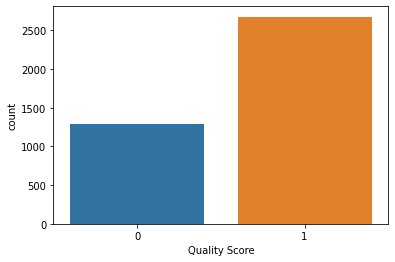

In [11]:
from seaborn import countplot
countplot(x='Quality Score', data = train_MSRPC_data)

### Step 2 : Reasonable Baseline - distance edition 

In [40]:
import editdistance
evals = []
for i in range(len(train_MSRPC_data['Sentence 1'])):
    print(i)
    sent1 = train_MSRPC_data['Sentence 1'][i]
    print(sent1,sent2,sep='\n')
    sent2 = train_MSRPC_data['Sentence 2'][i]
    ev = editdistance.eval(sent1,sent2)
    print(ev)
    evals.append(ev)


0
Amrozi accused his brother, whom he called "the witness", of deliberately distorting his evidence.
nan
53
1
Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.
Referring to him as only "the witness", Amrozi accused his brother of deliberately distorting his evidence.
49
2
They had published an advertisement on the Internet on June 10, offering the cargo for sale, he added.
Yucaipa bought Dominick's in 1995 for $693 million and sold it to Safeway for $1.8 billion in 1998.
57
3
Around 0335 GMT, Tab shares were up 19 cents, or 4.4%, at A$4.56, having earlier set a record high of A$4.57.
On June 10, the ship's owners had published an advertisement on the Internet, offering the explosives for sale.
60
4
The stock rose $2.11, or about 11 percent, to close Friday at $21.51 on the New York Stock Exchange.
Tab shares jumped 20 cents, or 4.6%, to set a record closing high at A$4.57.
59
5
Revenue in the first quarter of the year dropped 15 percent from the sam

TypeError: object of type 'float' has no len()

In [35]:
len(train_MSRPC_data['Sentence 1'])

3962

### Step 3 : Improving the baseline 

### Step 4: Choosing the best system 

### Step 5 : Neat Analysis of the chosen system

### Step 6 : Search for weaknesseness in the system and try to correct them

### Step 7 : Testing the system on new data (later)  

# The end.